<a href="https://colab.research.google.com/github/shanaka-desoysa/notes/blob/main/docs/Finance/Calculate_Composite_Rate_for_Series_I_Bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate Composite Rate for Series I Savings Bonds (I Bonds) using CPI




## Install Packages

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader.fred import FredReader

In [84]:
end_date = pd.to_datetime('today').date()
start_date = (end_date + pd.DateOffset(years=-2)).date()

print(f'start_date: {start_date} to end_date: {end_date}')

start_date: 2020-04-23 to end_date: 2022-04-23


## Download CPI Data from FRED

Download Consumer Price Index for All Urban Consumers - Not Seasonaly Adjusted (CPIAUCNS).

https://fred.stlouisfed.org/series/CPIAUCNS

In [93]:
df = FredReader('CPIAUCNS', start=start_date).read()

In [94]:
df

,CPIAUCNS
DATE,
2020-05-01,256.394
2020-06-01,257.797
2020-07-01,259.101
2020-08-01,259.918
2020-09-01,260.280
2020-10-01,260.388
2020-11-01,260.229
2020-12-01,260.474
2021-01-01,261.582


## Plot CPI Data

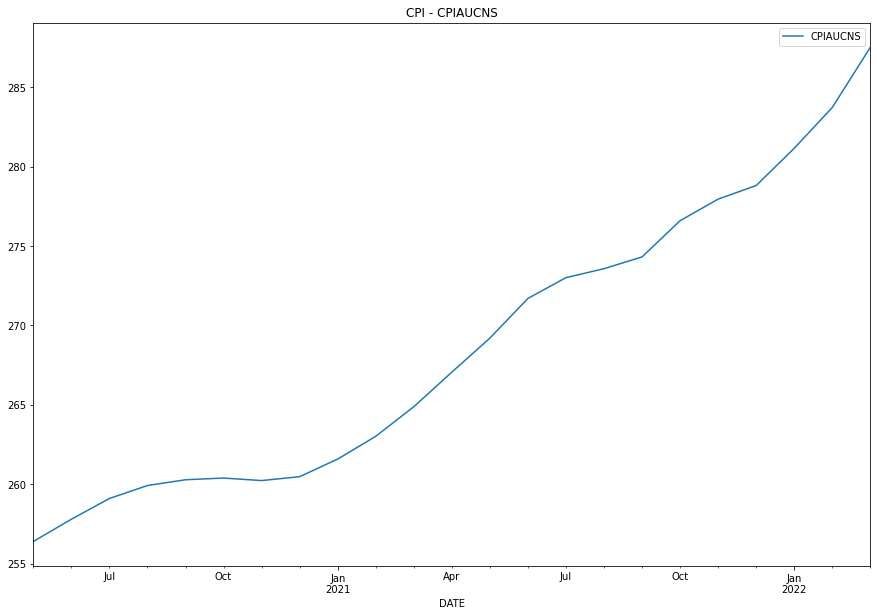

In [95]:
df.plot(title='CPI - CPIAUCNS', figsize=(15,10));

## Calculate Percent Change

In [98]:
df['CPIAUCNS-1m'] = df['CPIAUCNS'].shift(periods=1)
df['CPIAUCNS-6m'] = df['CPIAUCNS'].shift(periods=6)
df['CPIAUCNS-12m'] = df['CPIAUCNS'].shift(periods=12)
df

,CPIAUCNS,CPIAUCNS-1m,CPIAUCNS-6m,CPIAUCNS-12m
DATE,,,,
2020-05-01,256.394,NaN,NaN,NaN
2020-06-01,257.797,256.394,NaN,NaN
2020-07-01,259.101,257.797,NaN,NaN
2020-08-01,259.918,259.101,NaN,NaN
2020-09-01,260.280,259.918,NaN,NaN
2020-10-01,260.388,260.280,NaN,NaN
2020-11-01,260.229,260.388,256.394,NaN
2020-12-01,260.474,260.229,257.797,NaN
2021-01-01,261.582,260.474,259.101,NaN


Composite Rate is 6 months percentage change multiplied by 2 (annualized).

In [115]:
df['percent_change_1m'] = (df['CPIAUCNS'] - df['CPIAUCNS-1m'])*100 / df['CPIAUCNS-1m']
df['percent_change_6m'] = (df['CPIAUCNS'] - df['CPIAUCNS-6m'])*100 / df['CPIAUCNS-6m']
df['percent_change_12m'] = (df['CPIAUCNS'] - df['CPIAUCNS-12m'])*100 / df['CPIAUCNS-12m']

# Composite Rate
df['percent_change_6m_annualized'] = df['percent_change_6m'] *2
df

,CPIAUCNS,CPIAUCNS-1m,CPIAUCNS-6m,CPIAUCNS-12m,percent_change_1m,percent_change_6m,percent_change_12m,percent_change_6m_annualized
DATE,,,,,,,,
2020-05-01,256.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-01,257.797,256.394,NaN,NaN,0.547205,NaN,NaN,NaN
2020-07-01,259.101,257.797,NaN,NaN,0.505824,NaN,NaN,NaN
2020-08-01,259.918,259.101,NaN,NaN,0.315321,NaN,NaN,NaN
2020-09-01,260.280,259.918,NaN,NaN,0.139275,NaN,NaN,NaN
2020-10-01,260.388,260.280,NaN,NaN,0.041494,NaN,NaN,NaN
2020-11-01,260.229,260.388,256.394,NaN,-0.061063,1.495745,NaN,2.991490
2020-12-01,260.474,260.229,257.797,NaN,0.094148,1.038414,NaN,2.076828
2021-01-01,261.582,260.474,259.101,NaN,0.425378,0.957542,NaN,1.915083


## Composite Rate
As we can see above latest composite rate based on March CPI data is ***9.62%***

## Plot Percent Changes over Time

In [101]:
pct_columns = ['percent_change_1m', 'percent_change_6m', 'percent_change_12m', 'percent_change_6m_annualized']

In [114]:
df[pct_columns].tail(12)

,percent_change_1m,percent_change_6m,percent_change_12m,percent_change_6m_annualized
DATE,,,,
2021-04-01,0.821891,2.560026,NaN,5.120052
2021-05-01,0.801711,3.445427,4.992707,6.890854
2021-06-01,0.929066,4.308299,5.391451,8.616599
2021-07-01,0.481052,4.366126,5.365475,8.732252
2021-08-01,0.206591,4.012334,5.251272,8.024668
2021-09-01,0.271597,3.561276,5.390349,7.122551
2021-10-01,0.830812,3.570439,6.221869,7.140878
2021-11-01,0.491343,3.251546,6.809003,6.503093
2021-12-01,0.307252,2.615423,7.036403,5.230846


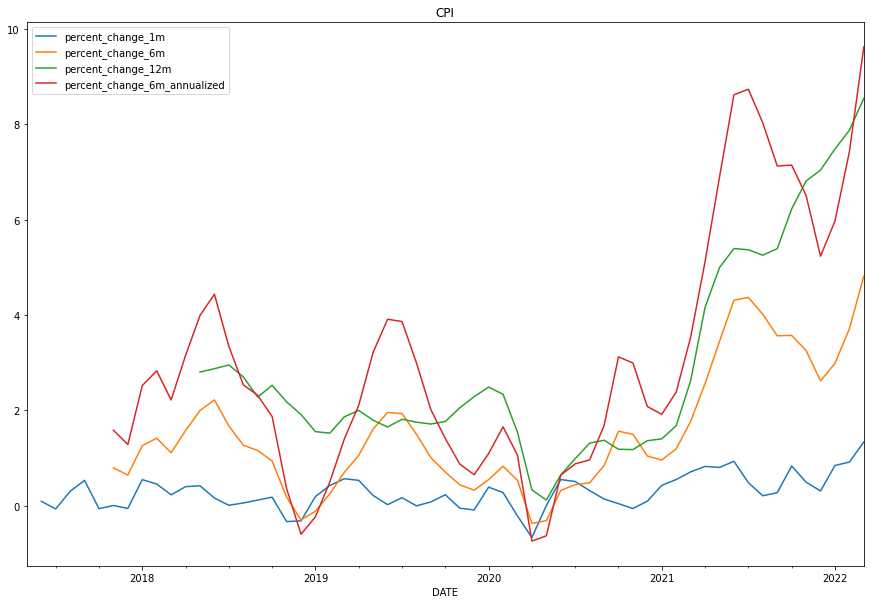

In [83]:
df[pct_columns].plot(title='CPI', figsize=(15, 10));